# The Markov chain Monte Carlo (MCMC) method

## Markov chain Monte Carlo optimisations

Optimising or finding the minima of functions is a surprising application of the use of random numbers.  These types of simulations find use in a variety of areas of statistical physics, quantum mechanics, and strangely enough curve fitting.

The general strategy for finding the minimum of a function $ F $ is the following.  We make a guess at the initial variables and compute the value of the function $ F $.  We then conduct a random walk in these variables, accepting those moves that reduce the value of F as well as some small random fluctuations to larger values of $ F $.  This random walk through parameters is continued until the parameters converge and fluctuate around a fixed value.  This strategy for minimisation utilises random numbers to explore parameter values without bias, to generate fluctuations that allow the solution to escape local minima in parameter space, and provides a distribution of states around minima.


We will use a variant of the *Metropolis-Hastings* algorithm.  This type of Markov chain Monte Carlo simulation involves the following steps:
1. Choose a starting state, which we’ll call state 0.
2. *Propose* a move at random from an allowed set of moves. This would take the system from state $ i $ to a new state $ i+1 $.
3. Calculate the value of the *acceptance probability* $P_\mathrm{a}$

$$
    P_\mathrm{a} = \begin{cases}
                 1 & \text{if}\qquad F_{i+1} < F_i  \\
                 \exp\{-\beta(F_{i+1} - F_{i})\} & \text{if}\qquad  F_{i+1} \geq F_i
          \end{cases}
$$

where $ F_i $ is the value of the function $ F $ at state $ i $. In other words, if we find a lower value of the function, we will certainly accept the move; if we find a higher value, there is still some probability that we will accept it, depending on how much higher it is and on the value of the acceptance parameter $ \beta $.
4. With probability $ P_\mathrm{a} $ *accept* the proposed move, and change the state of the system to the new one; otherwise reject it, meaning the system stays in the current state for one more step of the calculation.
5. Measure the value of the quantities of interest in the current state and add it to a running sum of such measurements (or store the values of the chain and analyse them later).
6. Repeat from step 2 until the value of $ F_i $ effectively converges.

This process produces a series of states of the system, or a *Markov chain* of states.

The process is a random walk through parameter space.  However, not all steps are accepted; only those that optimise our global function $ F $ with some allowance for fluctuations that are controlled through the step sizes and the acceptance coefficient $ \beta $.

For our simple version of this algorithm we will store all states of the system and analyse them when we are done iterating.

## A 2D function with multiple minima

Here we'll use a simple illustrative example of the method to find the minima of a 2-d function that has multiple local minima in addition to its global minimum.

$$ 
\\
\text{func_2d}(x,y) = r^2 \bigg(1 -  1/2\sin^2(\pi r/5)\bigg)
\\
$$

where

$$
r^2 = x^2 + y^2
$$

By inspection this function clearly has a global minimum at $ (0,0) $, but due to the oscillating $ \sin $ function has infinitely many other local minima, which form concentric circles in the $ xy $ plane.  In general, this is a tricky problem to solve with standard approaches that can be “fooled” by local minima if we do not make an initial guess close enough. In higher-dimensional parameter spaces  visualisation becomes problematic.  So, here we use the simple 2-D function above to illustrate the method.

**Creating a function `func_2d` using the mathematical function listed above.**

**Making a 3D surface plot of the function using the code below, plotting in the range $ -25 \leq x, y \leq 25 $, and visually confirming the location of the global and local minima.**

In [35]:
import numpy as np
from numpy.random import random, seed
import matplotlib.pyplot as plt

Text(0.5, 0, 'func_2d(x,y)')

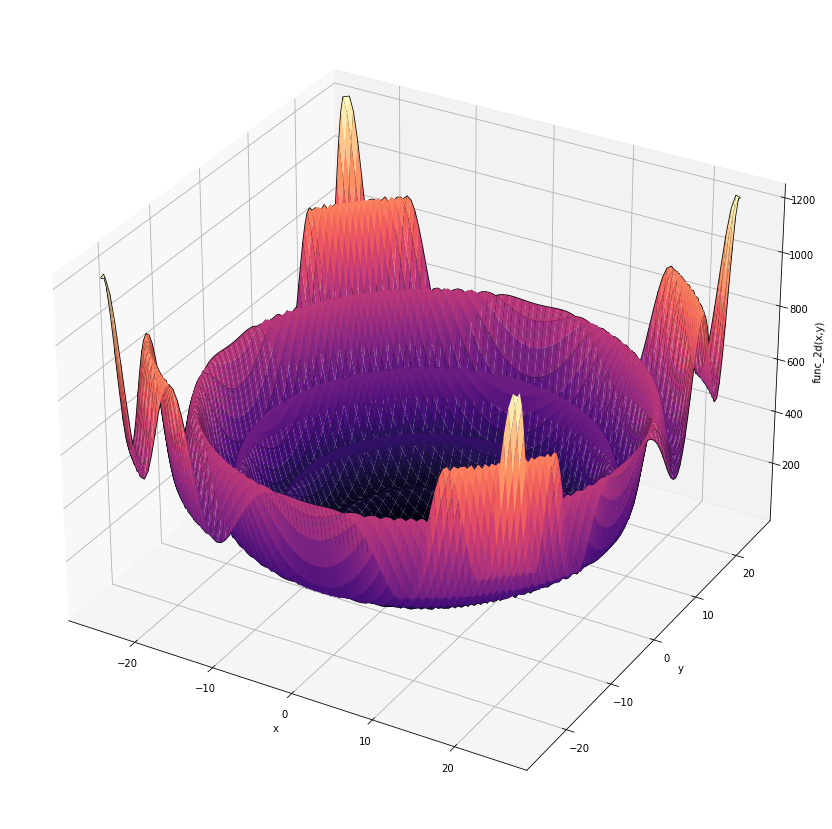

In [36]:
from mpl_toolkits.mplot3d import Axes3D  
import numpy as np
# Axes3D import enables using projection='3d' in add_subplot s

def func_2d(x,y):
    """func2d - a mathematical function of x and y with multiple local minima
    """
    return (x**2 + y**2)*(1 - 0.5*np.sin(np.pi*np.sqrt(x**2+y**2)/5)*np.sin(np.pi*np.sqrt(x**2+y**2)/5))
 

x = np.linspace(-25, 25, 100)  #  setup grid points for surface plotting
y = np.linspace(-25, 25, 100)

X, Y = np.meshgrid(x, y)

Z = func_2d(X, Y)

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection="3d")
ax.plot_wireframe(X, Y, Z, color='black')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='magma', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('func_2d(x,y)')

###  Finding the minimum of a function of more than one variable

Here we seek to minimize the function `func_2d` with respect to some parameters ($x$ and $y$ in this case).  In general, finding the minimum of a function in more than one dimension is difficult. 

We deliberately start the function off some way from the global minimum, at $x = y = 12$ which is near the second “ring” minimum. At each step we allow both $x$ and $y$ to vary by up to $\pm 1$.

Initially we will use a value of $\beta = 0.1$ and run our Markov chain for 100 000 steps.


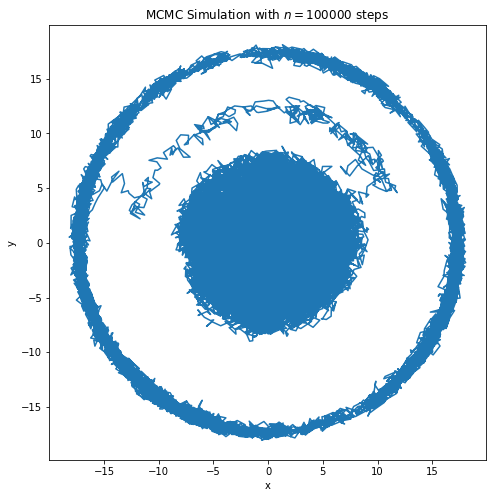

In [37]:
from numpy import random
import numpy as np
nsteps = 100000
seed(5)           # random number generator seed
beta = 0.1        # acceptance parameter
step_size = 1    # maximum step size in x and y

current_x, current_y = 12, 12 # starting position
current_F = func_2d(current_x, current_y)

x, y, F = [current_x], [current_y], [current_F]

for i in range(nsteps):
    step_x = (random.random() * (2*step_size))-step_size
    step_y = (random.random() * (2*step_size))-step_size# picking a random step between -step_size and +step_size.

    new_x = current_x + step_x
    new_y = current_y + step_y
    new_F = func_2d(new_x, new_y)
    dF = new_F - current_F
    Pa = np.exp(-beta*dF)
    if (dF < 0) or (Pa > random.random()): # put the Metropolis-Hastings condition here: do we accept the "new" values or not?
        current_x, current_y, current_F = new_x, new_y, new_F

    # in any case, we add the "current" values to the appropriate lists
    x.append(current_x)
    y.append(current_y)
    F.append(current_F)

#plotting the walk to a solution:
plt.figure(figsize=(8, 8))
plt.title(f"MCMC Simulation with $n = {nsteps}$ steps")
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)
plt.gca().set_aspect('equal')

This path taken through the parameter space – in this case the $xy$-plane – is the “chain” of states that we will analyse. Can you see the chain initially explore the “ring”, eventually finding the central minimum?

The parts of the chain where the solution is fluctuating about the function's minimum is referred to as 'the posterior'.  Analysing the posterior can provide information both about the coordinates in phase space (again $x-y$ in this simple example) where the minimum exists. The distribution of states as the simulation fluctuates around the minima reflect the probability distribution of possible states. 

### Isolating the posterior distribution


you can analyse distribution of all the states in the chain to identify a best single solution and the distribution about it.

To do this I will need to 'slice' off 'the burn in' phase of the chain and the first bit of 'the posterior.'

The basic requirements in slicing here are that, 

- you slice far enough away from the initial state that it is forgotten in the posterior part of the chain, and 

- you have enough points around the minimum to characterise the distribution there.

**Using my plot of the $f(x,y)$ vs. $\log(i)$ I identified a suitable array index to slice my chain and store the posterior in new arrays**.

In [38]:
islice = 24000
xpost = x[islice:]
ypost = y[islice:]
Fpost = F[islice:]

In [39]:
np.argmin(xpost), np.min(xpost)

(43642, -8.840273779552753)

### Graphical analysis of the posterior distribution

The distribution of states in the posterior portion of the chain contains statistical information about the solution.  In statistical physics simulations states reflect the distribution of states (e.g., the Maxwell-Boltzmann distribution).  In the usage here these states may reflect the uncertainty in the 'best' solution.  The distributions may also be affected by the step sizes, the acceptance conditions (e.g. $\beta$) and other aspects of the model.

**Plotting  histograms of $x$ and $y$ of the posterior solution**.

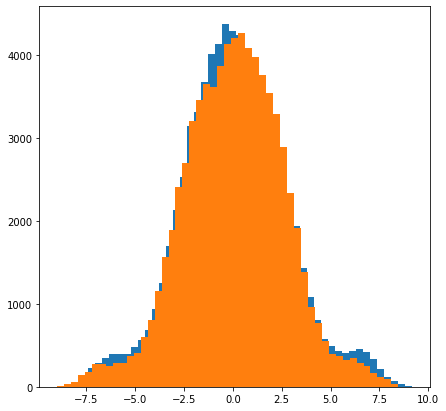

In [40]:
plt.figure(figsize=(7,7))
plt.hist(xpost, bins=50)
plt.hist(ypost, bins=50)
plt.show()

When we are optimising in more than one dimension we can also look for correlations between the 'best fit' parameters.  Here this can be done by looking at a scatter plot of the points in the posterior distribution.

In the example below the points are given a colour that is scaled with the logarithm of the function we are minimising (*i.e.*, $\log_{10}\{\text{func_2d}(x,y)\}$).  This makes it abundantly clear where the minimum is and how narrow or wide this minimum is.  


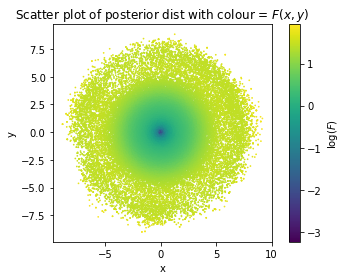

In [41]:
imin = np.argmin(Fpost)
imax = np.argmax(Fpost)

plt.figure()
plt.scatter(xpost,ypost,s=.5,
            c=np.log10(Fpost),
            vmin=np.log10(Fpost[imin]),
            vmax=np.log10(Fpost[imax]))
plt.colorbar(label='$\log(F)$')
plt.title('Scatter plot of posterior dist with colour = $F(x,y)$')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal')

## Non-linear fitting with the Metropolis-Hastings MCMC method

Here we look to fit a series of observed data points with a non-linear function. This is one of the most common numerical tasks in science.  There are several different numerical approaches for obtaining a fit (*e.g.*, non-linear Newton-Raphson), including some contained in Python modules (*e.g.*, `scipy.optimize.curve_fit`).

However, since the basic operation of fitting is to reduce the norm of the residuals between a fitting function and the data points (*i.e.*, the “chi-squared”, $\chi^2$), the Metropolis minimisation algorithm described above can readily be adapted to this problem. This is particularly useful in higher-dimensional parameter spaces.  Here we’ll use a slightly unorthodox Markov Chain Monte Carlo method to explore the range of parameters that are consistent with a simulated data set.

The task we will set ourselves is to fit the peak in the following data set:

In [42]:
data_x = np.array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.])
data_y = np.array([10.6 , 16.  , 45.  , 83.5 , 52.8 , 19.9 , 10.8 ,  8.25,  4.7 ])
data_y_err = np.array([4., 4., 4., 4., 4., 4., 4., 4., 4.])

We will fit a *Lorentzian* peak of the form

$$
L(x) = \frac{A}{(x - x_0)^2 + \gamma^2}.
$$

The Lorenztian function is commonly used when fitting intensity as a function of wavelength to identify spectral lines.  With a proper fit, the value of $x_o$ is the wavelength of of the central peak of an emmission or absorption line, $A$ is related to the intensity and $\gamma^2$ the width of the line.  So, finding best-fit values of these parameters is a way of measuring of the properties of spectral lines.

Here our fitting parameters are $\mathbf{p} = (A, x_0, \gamma^2)$ which we will represent in Python by `param = (A, x0, gammasq)`.

**The Lorentzian function:**

In [43]:
def lorentzian(x, param):
    """Calculates a Lorentzian function at x with parameters param = (A, x0, gamma)."""
    A, x0, gammasq = param
    return A/(((x-x0)**2) + (gammasq))


**Finding a good guess at the initial parameters $A$, $x_o$, and $\gamma^2$ that produces a good fit to the data.  Plotting them on top of the data.** This time let’s use the `errorbar()` function to plot including error bars:

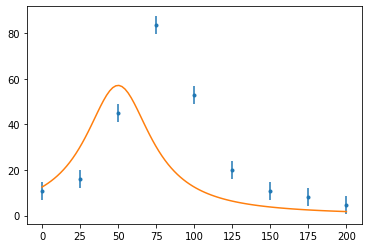

In [44]:
plt.figure()
plt.errorbar(data_x, data_y, fmt='.', yerr=data_y_err)

param_guess = 40000, 50,700 # a suitable guess

xplot = np.linspace(0,200,100)
yplot = lorentzian(xplot,param_guess)
plt.plot(xplot,yplot)

### Assessing goodness of fit

We assess the goodness of fit with some norm of the residuals.  Here we will use the weighted chi-squared function,

$$
\chi^2 = \sum_i\left( \frac{(f(x_i) - y_i)}{\sigma_i} \right)^2
$$
where $\sigma_i$ is the error in the measured $y_i$ values.

**Computing the weighted $\chi^2$ of the fit.**

In [45]:
def weighted_chi2(fitting_function,data,fit_params):
    data_x,data_y,data_y_err = data
    fit_y = fitting_function(data_x,fit_params)

    return sum(((fit_y - data_y)/data_y_err)**2)

print("Weighted chi-squared = ",weighted_chi2(lorentzian,(data_x,data_y,data_y_err),
                                              param_guess))

Weighted chi-squared =  318.45185853499595


### MCMC Metropolis Fit

Here we will use the MCMC Metropolis algorithm described to develop a better fit.  In this example, instead of making a random walk through the $x-y$ plane as we did above, we will be 'walking' through the $A$, $x0$, $\gamma^2$ three-dimensional parameter space.  

Here, each “state” is a set of $A$, $x_0$, $\gamma^2$.  The random walk will sample parameter values away from the previous state.  The function we are attempting to minimise is the $\chi^2$ function.  Specifically, if the new state reduces the value of $\chi^2$ then we accept it.  If it results in an increase in $\chi^2$, we might still accept it if

$$
\\ 
\text{random()}  < \exp\{-\beta(\chi^2_{i}-\chi^2_{i-1})\},
\\
$$
where $i$ indicates the proposed state and $i-1$ the previous one.

Best parameters according to our model =  67293.32771058835 78.29868379989941 866.7327974814731 Value of chi-square =  5.486514953926902


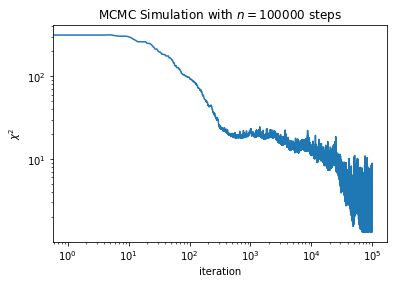

In [46]:
nsteps = 100000
seed(1)           # random number generator seed
beta = 1          # acceptance parameter

A_step_size = 50
x0_step_size = 1
gammasq_step_size = 5

# the data we're fitting
data = (data_x,data_y,data_y_err)

# initial guesses
current_A = 40000
current_x0 = 50
current_gammasq = 700

current_chisq = weighted_chi2(lorentzian,data,(current_A, current_x0, current_gammasq))

A, x0, gammasq, chisq = [current_A], [current_x0], [current_gammasq], [current_chisq]

for i in range(nsteps):
    A_step = A_step_size*2*(random.random() - 0.5)
    x0_step = x0_step_size*2*(random.random() - 0.5)
    gammasq_step = gammasq_step_size*2*(random.random() - 0.5)
    
    new_A = current_A + A_step
    new_x0 = current_x0 + x0_step
    new_gammasq = current_gammasq + gammasq_step
    
    new_chisq = weighted_chi2(lorentzian,data,(new_A, new_x0, new_gammasq))
    
    dchisq = new_chisq - current_chisq
    Pa = np.exp(-beta*(dchisq))

    if (new_chisq < current_chisq) or (Pa > np.random.random()) :
        current_A = new_A
        current_x0 = new_x0
        current_gammasq = new_gammasq
        current_chisq = new_chisq

    A.append(current_A)
    x0.append(current_x0)
    gammasq.append(current_gammasq)
    chisq.append(current_chisq)


#plotting chi-squared vs iteration number:
plt.figure()
plt.title(f"MCMC Simulation with $n = {nsteps}$ steps")
plt.xlabel('iteration')
plt.ylabel('$\chi^2$')
plt.loglog(chisq)

print('Best parameters according to our model = ', A[-1], x0[-1], gammasq[-1], 'Value of chi-square = ', chisq[-1])

### How good are these parameters?

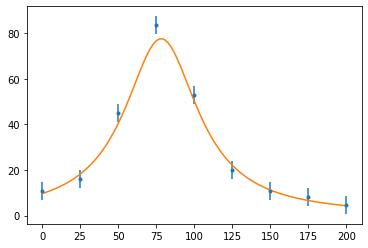

In [47]:
# Our best parameters (given above):
param_best = 67293.32771058835, 78.29868379989941, 866.7327974814731

plt.figure()
plt.errorbar(data_x, data_y, fmt='.', yerr=data_y_err)

xplot = np.linspace(0,200,100)
yplot = lorentzian(xplot,param_best)
plt.plot(xplot,yplot)

# As you can see, the curve is much better fitted!

In [48]:
#slicing data into the posterior

islice = 1000
A_post = A[islice:]
x0_post = x0[islice:]
gammasq_post = gammasq[islice:]
chisq_post = chisq[islice:]

imin = np.argmin(chisq_post)

print(A_post[imin], x0_post[imin], gammasq_post[imin], chisq_post[imin])

66966.26980035067 77.51605983707996 790.2205066105864 1.3170522995185234


A useful aspect of the posterior distribution is that it can illustrate how large a region of parameter space around the minimum provides a similar solution (e.g., value of $\chi^2$).  This can be used to estimate the uncertainties in the optimising or fitting parameters.

<Figure size 432x288 with 0 Axes>

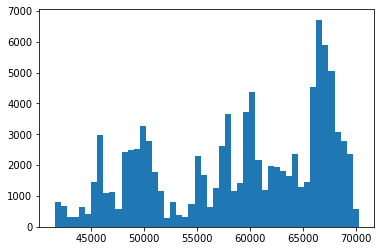

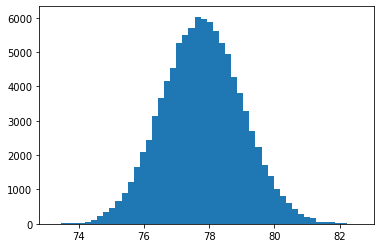

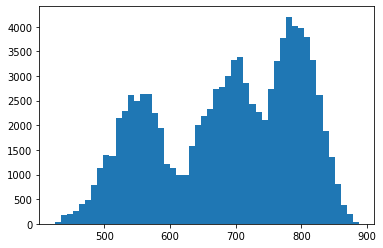

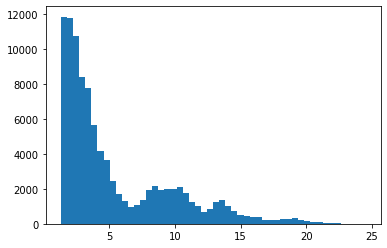

<Figure size 432x288 with 0 Axes>

In [49]:
plt.hist(A_post, bins=50)
plt.figure()
plt.hist(x0_post, bins=50)
plt.figure()
plt.hist(gammasq_post, bins=50)
plt.figure()
plt.hist(chisq_post, bins=50)
plt.figure()

Useful way of analysing MCMC posterior distributions is to identify any correlations between parameter values.

**Making scatter plots of $A$ vs $x_o$, $A$ vs $\gamma^2$, and $x_o$ vs $\gamma^2$.**

Text(0, 0.5, '$x_o$')

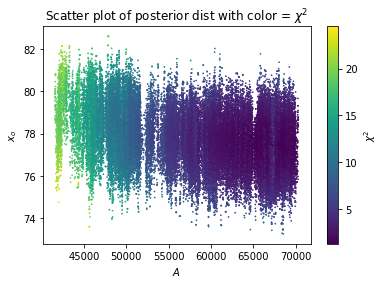

In [50]:
imin = np.argmin(chisq_post)
imax = np.argmax(chisq_post)

plt.figure()
plt.scatter(A_post,x0_post,s=.5,
            c=chisq_post,
            vmin=chisq_post[imin],
            vmax=chisq_post[imax])
plt.colorbar(label='$\chi^2$')
plt.title('Scatter plot of posterior dist with color = $\chi^2$')
plt.xlabel('$A$')
plt.ylabel('$x_o$')

Text(0, 0.5, '$x_o$')

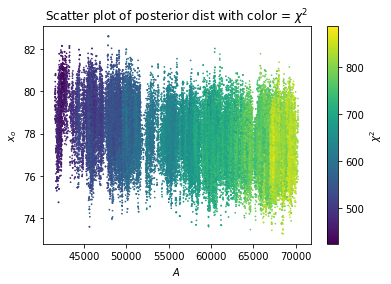

In [51]:
# modify the cell above for the other two plots
imin = np.argmin(gammasq_post)
imax = np.argmax(gammasq_post)

plt.figure()
plt.scatter(A_post,x0_post,s=.5,
            c=gammasq_post,
            vmin=gammasq_post[imin],
            vmax=gammasq_post[imax])
plt.colorbar(label='$\chi^2$')
plt.title('Scatter plot of posterior dist with color = $\chi^2$')
plt.xlabel('$A$')
plt.ylabel('$x_o$')